In [12]:
import pandas as pd
import numpy as np
df=pd.read_csv("E:/01.ATM/RDSP/RDSP_Txn_May19.csv")
print(df.head())
print(df.shape)

  Merchant id  OB_Succ  WA_Deli  Filed_Visit  Meet_Att  Txn_Cnt
0    I0001408        0        4            0         0      132
1    I0001473        0        4            0         0      125
2    I0000451        1        5            0         0       21
3    I0000724        0        4            0         0        4
4    I0000718        0        4            0         0        9
(685, 6)


In [13]:
# To check correlation
df.axes
newdf=df.loc[:,['OB_Succ', 'WA_Deli', 'Filed_Visit', 'Meet_Att', 'Txn_Cnt']]
print(newdf.head())

   OB_Succ  WA_Deli  Filed_Visit  Meet_Att  Txn_Cnt
0        0        4            0         0      132
1        0        4            0         0      125
2        1        5            0         0       21
3        0        4            0         0        4
4        0        4            0         0        9


In [15]:
newdf.corr()

,OB_Succ,WA_Deli,Filed_Visit,Meet_Att,Txn_Cnt
OB_Succ,1.000000,0.098025,0.039670,0.121980,-0.030917
WA_Deli,0.098025,1.000000,0.010156,-0.019120,0.086260
Filed_Visit,0.039670,0.010156,1.000000,-0.077254,-0.021456
Meet_Att,0.121980,-0.019120,-0.077254,1.000000,0.012896
Txn_Cnt,-0.030917,0.086260,-0.021456,0.012896,1.000000


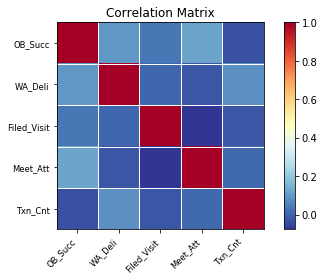

In [16]:
import statsmodels.graphics.api as smg
import matplotlib.pyplot as plt
corr_matrix = np.corrcoef(newdf.T)
smg.plot_corr(corr_matrix, xnames=newdf.columns)
plt.show()

In [19]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# OLS = Ordinary Least Squares - Regression
# smf = stats model formula

result = smf.ols('Txn_Cnt ~ OB_Succ', data=newdf).fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                Txn_Cnt   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6535
Date:                Fri, 10 May 2019   Prob (F-statistic):              0.419
Time:                        21:15:16   Log-Likelihood:                -3289.3
No. Observations:                 685   AIC:                             6583.
Df Residuals:                     683   BIC:                             6592.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.6805      1.458     13.498      0.0